<a href="https://colab.research.google.com/github/Cassiosa/projeto-imbd-e-nba/blob/main/Simulador_nivel_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simulator Télos - Nível 4 Trilha de Dados**

1.Raspagem de Dados IMDB

2.KPIs com Base da NBA

**Contextualização**

A análise de dados oferece insights valiosos para a tomada de decisões, e que coletar e tratar os dados corretamente é fundamental para que possamos elaborar os KPIs.

**Projeto de Análise de Dados**

1.	Top 25 melhores Filmes do Ranking IMDB

**Detalhes Projeto:**

O projeto utilizara de web scraping com Python e BeautifulDsoup Pra extrair os dados. Os dados serão coletados, processados e transformados via DataFrame do Pandas cona finalizada de analise. O projeto tem por finalidade de identificar insights sobre a qualidade, acessibilidade, duração e distribuição temporal dos filmes. Após as tratativas sera possível criar um dashboard intuitivo no Power BI.

**Requisitos:**

Python

Bibiotecas: beutifulsopup, pandas, matplotlib, plotly

Perguntas de negócios e KPIs:

Qual relação entre idade do filme e sua nota?
KPI: correlação entre Ano e Nota
Como a classificação Indicativa se relaciona com avaliação do filme?
KPI: Nota Média por faixa etária




In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.Raspagem de Dados IMDB

In [5]:
#Importando bibliotecas
import requests
from requests.exceptions import HTTPError
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

**Verificando o robts.txt**

Se faz necessário verificar no robots.txt se é permetida a coleta de dados  usanso raspagem de dados

In [6]:
URL = 'https://www.imdb.com/robots.txt'

try:
    response = requests.get(URL)
    response.raise_for_status()

    robots = response.text
    print(robots)

except requests.exceptions.RequestException as e:
    print(f'Erro ao acessar {URL}: {e}')

# robots.txt for https://www.imdb.com properties
User-agent: *
Disallow: /OnThisDay
Disallow: /ads/
Disallow: /ap/
Disallow: /mymovies/
Disallow: /r/
Disallow: /register
Disallow: /registration/
Disallow: /search/name-text
Disallow: /search/title-text
Disallow: /find
Disallow: /find$
Disallow: /find/
Disallow: /tvschedule
Disallow: /updates
Disallow: /watch/_ajax/option
Disallow: /_json/video/mon
Disallow: /_json/getAdsForMediaViewer/
Disallow: /list/ls*/_ajax
Disallow: /list/ls*/export
Disallow: /*/*/rg*/mediaviewer/rm*/tr
Disallow: /*/rg*/mediaviewer/rm*/tr
Disallow: /*/mediaviewer/*/tr
Disallow: /title/tt*/mediaviewer/rm*/tr
Disallow: /name/nm*/mediaviewer/rm*/tr
Disallow: /gallery/rg*/mediaviewer/rm*/tr
Disallow: /tr/
Disallow: /title/tt*/watchoptions
Disallow: /search/title/?title_type=feature,tv_movie,tv_miniseries,documentary,short,video,tv_short&release_date=,2020-12-31&lists=%21ls538187658,%21ls539867036,%21ls538186228&view=simple&sort=num_votes,asc&aft
Disallow: /name/nm*/fil

In [7]:
#Requisições
conteudo = None
URL = 'https://www.imdb.com/chart/top/'
print(URL)

https://www.imdb.com/chart/top/


In [8]:
#Cabeçalho mostrando que somos pessoas
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

In [9]:
#Metodo de tentativa
try:
  response = requests.get(URL,headers=headers)
  response.raise_for_status()
  conteudo = response.content
  print('Requisição bem sucedida')
except HTTPError as http_err:
  print(f'Ocorreu um erro HTTP: {http_err}')
except Exception as err:
  print(f'Ocorreu um erro generico:{err}')

Requisição bem sucedida


In [10]:
if conteudo is not None:
  print("Conteúdo da pagina foi baixado com sucesso")
else:
  print("Falha ao baixar o conteúdo da Página")

Conteúdo da pagina foi baixado com sucesso


In [11]:
conteudo_html = conteudo

pagina = BeautifulSoup(conteudo_html,'html.parser')


In [12]:
#Criando lista de Filmes para armazenar os detalhes de cada filme
listas_filmes = []

#Encontrando todos os elementos que contem os titulos dos filmes
titulos = pagina.find_all('a', class_='ipc-title-link-wrapper')

#Extratindo o conteudo dos fimes
for titulo in titulos:
    # Extraindo o texto do título do filme
    nome_filme = titulo.find('h3', class_='ipc-title__text').get_text(strip=True)

    #Extratindo Ano, Duração, e Classificação Indicativa
    pai = titulo.find_parent('li', class_='ipc-metadata-list-summary-item')

    metadata = pai.find('div', class_='sc-b189961a-7 btCcOY cli-title-metadata')
    if metadata is None:
      continue

    ano = metadata.find_all('span', class_='sc-b189961a-8')[0].get_text(strip=True)
    ano = re.search(r'\d{4}', ano).group()

    duracao = metadata.find_all('span', class_='sc-b189961a-8')[1].get_text(strip=True)
    duracao = re.search(r'\d+h\d+min', duracao).group()

    classificao = metadata.find_all('span', class_='sc-b189961a-8')[2].get_text(strip=True)
    classificao = classificao.strip()


    filmes_info = {
      'Titulo': nome_filme,
      'Ano': ano,
      'Duracao': duracao,
      'Classificação Indicativa': classificao,
  }
    listas_filmes.append(filmes_info)

In [13]:
#Criando dataFrame (Pandas)
df_filmes = pd.DataFrame(listas_filmes)

In [14]:
#Salvando planilha csv
df_filmes.to_csv('filmes_imdb.csv', index=False)

In [15]:
df_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


**Preparando dados**

In [ ]:
#Carregando dataset
df = pd.read_csv('filmes_imdb.csv')

#Funcçao para converte Classifcação Indicativa
def converter_classificacao(classificação):
    if classificação == 'Not Rated':
        return 0
    elif classificação.isdigit():
        return int(classificação)
    else:
        return 18# Para casos não númericos

#Função para converter Duração
def converter_duração(duração):
    horas = re.search(r'(\d+)h', duração)
    minutos = re.search(r'(\d+)min', duração)
    if horas and minutos:
        return int(horas.group(1)) * 60 + int(minutos.group(1))
    elif horas:
        return int(horas.group(1)) * 60



#Criando um novo Dataframe com as informações tratadas
df_filmes_tratados = df.copy()

#Aplicado as Conversões

df_filmes_tratados['Classificação Indicativa'] = df_filmes_tratados['Classificação Indicativa'].apply(converter_classificacao)
df_filmes_tratados['Duração'] = df_filmes_tratados['Duracao'].apply(converter_duração)

#Removendo coluna antiga
df_filmes_tratados['Ano'] = df_filmes_tratados['Ano'].astype(int)
df_filmes_tratados.drop(columns=['Duracao'], inplace=True)

#Verificado tipos de dados
df_filmes_tratados.dtypes

#Exibindo as Primeiras lnhas do DatFrame tratdo
df_filmes_tratados.head(25)


,Titulo,Ano,Classificação Indicativa,Duração
0,1. The Shawshank Redemption,1994,18,120
1,2. The Godfather,1972,18,120
2,3. The Dark Knight,2008,18,120
3,4. The Godfather Part II,1974,18,180
4,5. 12 Angry Men,1957,18,60
5,6. Schindler's List,1993,18,180
6,7. The Lord of the Rings: The Return of the King,2003,18,180
7,8. Pulp Fiction,1994,18,120
8,9. The Lord of the Rings: The Fellowship of th...,2001,18,120
9,"10. The Good, the Bad and the Ugly",1966,18,120


In [ ]:
#Informações Gerais do dataset
df_filmes_tratados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Titulo                    25 non-null     object
 1   Ano                       25 non-null     int64 
 2   Classificação Indicativa  25 non-null     int64 
 3   Duração                   25 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 928.0+ bytes


In [ ]:
#Estatista Descritivas Basica do dataset
df_filmes_tratados.describe()

,Ano,Classificação Indicativa,Duração
count,25.000000,25.00,25.000000
mean,1988.440000,17.28,124.800000
std,18.175258,3.60,29.597297
min,1946.000000,0.00,60.000000
25%,1975.000000,18.00,120.000000
50%,1994.000000,18.00,120.000000
75%,2001.000000,18.00,120.000000
max,2014.000000,18.00,180.000000


**Análise Grafica**


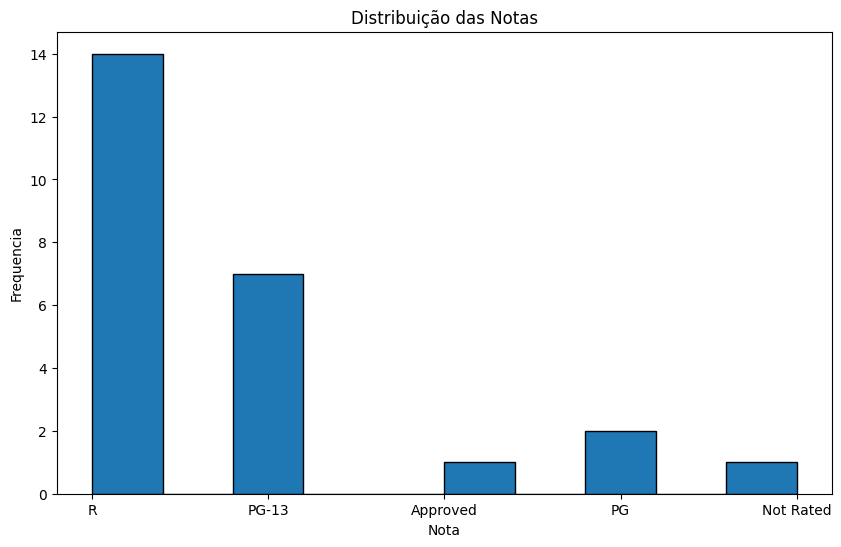

In [ ]:
#Visualizações basicas
#notas
plt.figure(figsize=(10,6))
plt.hist(df['Classificação Indicativa'], bins=10, edgecolor='black')
plt.title('Distribuição das Notas')
plt.xlabel('Nota')
plt.ylabel('Frequencia')
plt.show()

Distribuição das Classificações Indicativas:

Concentração em certos intervalos: O histograma pode mostrar onde a maioria das classificações indicativas está concentrada. Por exemplo, pode haver uma concentração em torno de classificações mais baixas (como "Livre" ou "10 anos") ou mais altas (como "18 anos").

Dados uniformemente distribuídos ou enviesados:

Se a distribuição for uniforme, as barras terão alturas similares ao longo de todos os bins, indicando que as classificações indicativas estão distribuídas de maneira homogênea. Se houver uma concentração em certas áreas, isso pode indicar que a maioria dos filmes está sendo classificada dentro de um intervalo específico, o que poderia revelar a predominância de filmes mais acessíveis ou mais restritos para certas faixas etárias.

Possíveis Outliers:

Picos inesperados: Caso haja um pico inesperado em uma faixa etária específica, isso pode ser um indício de que muitos filmes estão sendo classificados em um grupo restrito. Isso pode levar a investigações mais detalhadas sobre por que isso está ocorrendo, como mudanças nas políticas de classificação indicativa ou uma tendência de conteúdo para faixas etárias específicas.

Distribuição incomum: Caso haja categorias de classificação que aparecem muito raramente ou estão ausentes (ou seja, se algumas barras são muito baixas ou não existem), isso pode indicar um viés nos dados de filmes analisados. Talvez haja uma falta de filmes para certas faixas etárias.

Granularidade dos Dados:

Escolha do número de bins: A escolha de 10 bins pode ser adequada se houver um número moderado de classificações indicativas diferentes (por exemplo, de "Livre" até "18 anos"). No entanto, se as classificações tiverem uma gama muito ampla ou forem limitadas a poucas categorias, pode ser interessante ajustar o número de bins. Um número menor de bins pode agrupar classificações de forma mais eficaz e tornar o gráfico mais fácil de interpretar.

Distribuição em faixas etárias: O histograma pode revelar tendências sobre a produção de filmes voltados para crianças (classificações mais baixas) versus filmes para adultos (classificações mais altas).

Análise Comparativa:

Se você estiver coletando dados de filmes ao longo de vários anos, pode ser interessante traçar um gráfico semelhante por ano e ver como a distribuição de classificações indicativas mudou ao longo do tempo. Isso pode ajudar a identificar tendências, como o aumento ou diminuição de filmes mais adultos ou infantojuvenis.

Frequência dos Filmes por Classificação Indicativa:

O eixo Y do gráfico mostra a frequência, ou seja, quantos filmes caem em cada classificação indicativa. Isso pode ser útil para identificar se existe uma predominância de filmes classificados como, por exemplo, "14 anos" ou "18 anos". Se houver uma alta concentração em uma classificação, isso pode ser um indicativo das preferências do público ou das restrições impostas pelas distribuidoras.

Sugestões para Exploração Adicional:

Gráficos adicionais para análise de outras variáveis: Pode ser interessante comparar essa distribuição com outras variáveis, como a duração dos filmes ou a nota atribuída pelos usuários. Isso pode ser feito, por exemplo, traçando um gráfico de dispersão que relacione a classificação indicativa com a nota média dos filmes.

Análise temporal:

Se você possui os dados de ano de lançamento, poderia criar um gráfico que mostra a evolução das classificações indicativas ao longo do tempo, ajudando a visualizar mudanças nas regulamentações de censura ou tendências de conteúdo.

Conclusão:

O histograma oferece uma visão clara da distribuição de classificações indicativas, revelando possíveis concentrações de filmes em certas categorias de classificação. Dependendo da forma da distribuição, é possível identificar padrões e tendências no conteúdo que está sendo produzido. Isso pode trazer insights sobre preferências de público ou mudanças nas normas de classificação

In [1]:
# Gerar dados aleatórios para Duração (apenas para exemplo)
df_imdb['Duração'] = np.random.randint(90, 180, size=len(df_imdb))
plt.scatter(df_imdb['Duração'], df_imdb['Nota'], c='purple')
plt.title('Relação entre Nota e Duração do Filme')
plt.xlabel('Duração (min)')
plt.ylabel('Nota')
plt.show()

NameError: name 'np' is not defined

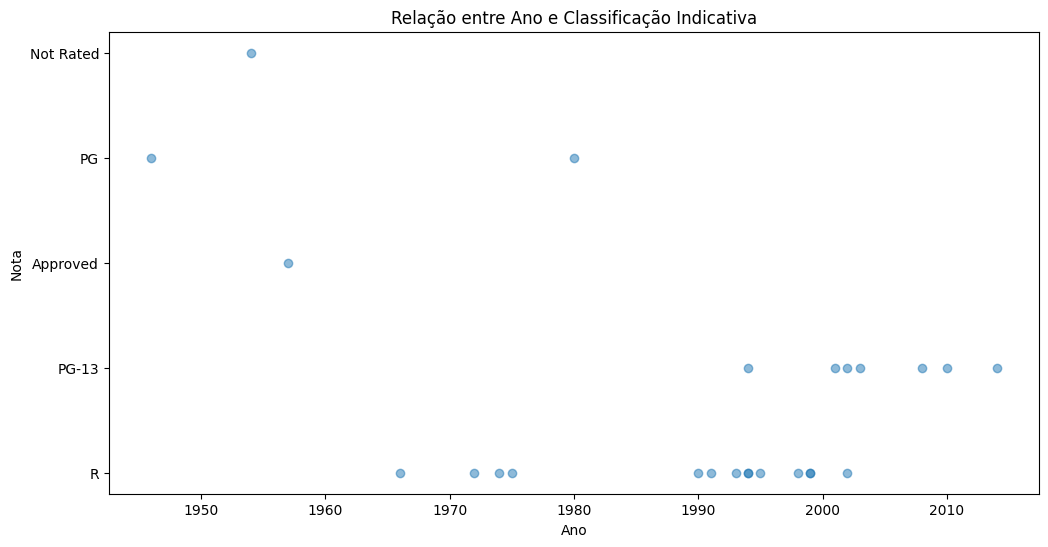

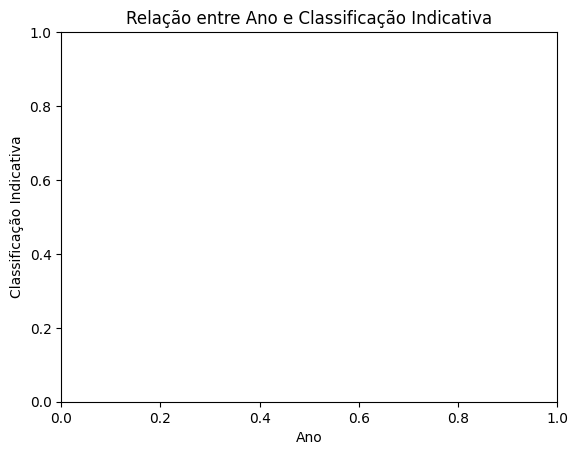

In [ ]:
#Grafico de dispersão: Ano vs Classificação Indicativa
plt.figure(figsize=(12,6))
plt.scatter(df['Ano'], df['Classificação Indicativa'], alpha=0.5)
plt.title('Relação entre Ano e Classificação Indicativa')
plt.xlabel('Ano')
plt.ylabel('Nota')
plt.show()

plt.title('Relação entre Ano e Classificação Indicativa')
plt.xlabel('Ano')
plt.ylabel('Classificação Indicativa')
plt.show()


Boxplot - Notas por Classificação Indicativa:

O segundo gráfico  mostra a relação entre a classificação indicativa dos filmes e as notas recebidas. Um boxplot é ótimo para visualizar a distribuição e dispersão dos dados, além de identificar valores atípicos.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<function matplotlib.pyplot.show(close=None, block=None)>

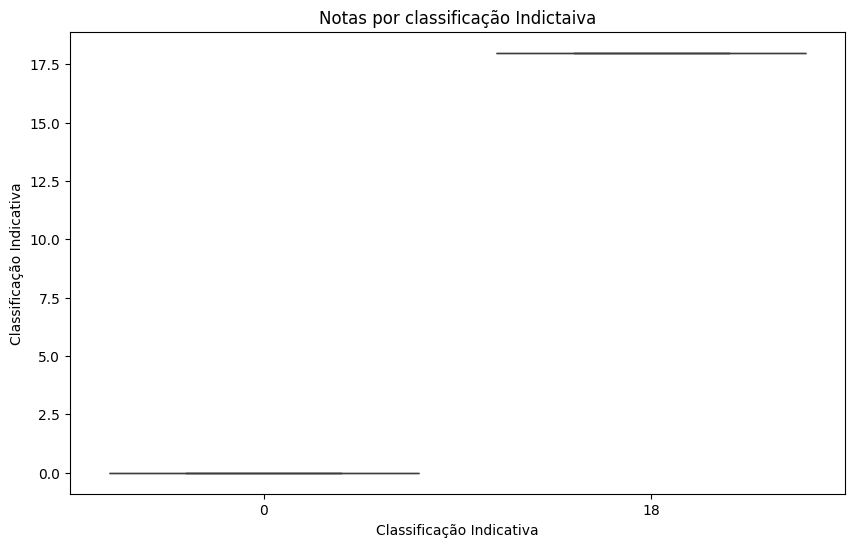

In [ ]:
#bloxplot das notas por classificação Indicativa
plt.figure(figsize=(10,6))
sns.boxplot(x='Classificação Indicativa', y='Classificação Indicativa', data=df_filmes_tratados)
plt.title('Notas por classificação Indictaiva')
plt.show

Gráfico de Dispersão - Relação entre Ano e Classificação Indicativa:

O gráfico de dispersão é útil para visualizar como as classificações indicativas se distribuem ao longo dos anos de lançamento dos filmes.

Possíveis Insights:

Distribuição ao longo do tempo:
Se você observar que as classificações indicativas variam significativamente ao longo dos anos, isso pode indicar uma evolução nas tendências de classificação. Por exemplo, se as classificações mais altas ("18 anos") estão se tornando mais frequentes em anos recentes, isso pode refletir uma mudança nas normas culturais ou nas políticas de censura.
Concentração de certos anos em classificações específicas: Um agrupamento de pontos em torno de certos anos pode indicar mudanças significativas na produção cinematográfica. Por exemplo, um aumento de filmes com classificações "14 anos" ou "16 anos" após determinado ano pode ser uma resposta às mudanças nas preferências do público.

Possíveis mudanças nas regulamentações: Se você notar um aumento de filmes mais restritos em anos específicos, pode ser interessante investigar mudanças nas regulamentações de classificação indicativa que possam ter ocorrido.

O que observar:

Tendências temporais: Há uma evolução das classificações mais baixas (filmes mais infantis) para classificações mais altas (filmes adultos) com o passar do tempo?
Picos ou quedas anômalas: Se houver anos com uma concentração incomum de filmes em uma classificação específica, isso pode ser digno de análise.

**Conclusão**

Relação entre Ano de Lançamento e Classificação Indicativa:
Tendências temporais: O gráfico de dispersão permite observar como as classificações indicativas dos filmes variaram ao longo do tempo. Se as classificações mais altas, como "16 anos" ou "18 anos", se tornarem mais frequentes em anos recentes, isso pode sugerir uma mudança nas preferências da produção cinematográfica, que talvez esteja focando em conteúdos mais maduros e complexos.
Mudanças na produção: Se filmes voltados para audiências mais jovens diminuírem ao longo do tempo, pode ser um reflexo das tendências de mercado e mudanças nas normas culturais. Ao mesmo tempo, um aumento de filmes adultos pode sinalizar um público mais interessado em temáticas complexas ou de apelo a adultos.
Picos ou quedas: Qualquer concentração de classificações indicativas em determinados períodos pode indicar mudanças nas regulamentações de censura ou resposta a eventos culturais específicos que impactaram a produção cinematográfica.

 Distribuição das Notas por Classificação Indicativa:
Diferença de aceitação por faixa etária: O boxplot das notas por classificação indicativa revela como o público avalia os filmes em diferentes faixas etárias. Filmes com classificação mais baixa (como "Livre" ou "10 anos") podem ter notas médias mais altas devido ao seu apelo mais amplo e familiar. Já filmes com classificações mais altas, como "18 anos", podem apresentar uma maior dispersão nas notas, indicando que filmes adultos tendem a ser mais polarizadores e recebem uma gama mais variada de avaliações.
Outliers: A presença de outliers (valores fora da caixa central do boxplot) indica filmes que se destacam por serem extremamente bem ou mal avaliados, o que pode ser explorado para entender o que faz esses filmes únicos em suas categorias.


Tendências de produção cinematográfica: A evolução das classificações indicativas ao longo dos anos e a distribuição de notas por faixa etária mostram tendências claras sobre a indústria cinematográfica. O aumento de filmes com classificações mais altas pode refletir uma produção mais voltada ao público adulto, enquanto filmes para audiências mais jovens mantêm boas avaliações médias.
Preferências do público: Filmes voltados para todas as idades tendem a ter uma recepção mais positiva, enquanto filmes mais adultos têm uma recepção mais variada, com maior polarização entre as avaliações.
Esses insights fornecem uma visão geral do comportamento da indústria cinematográfica e das preferências do público, ajudando a entender melhor como diferentes classificações indicativas afetam a recepção e popularidade dos filmes ao longo do tempo.

2. Projeto de Análise de Dados da NBA para Team Sacramento Kings Descrição do Projetos
O projeto promove uma análise dos dados na NBA, com foco em utilizar o presidente do Sacramento Kings na tomada de descrição estratégia para melhor desempenho do time. O projeto utiliza a biblioteca Pandas para processar a analise e bibliotecas atuais para criar insights informativos e interativos

Resultados desenvolvidos:

Aprimoramento das habilidades de web scraping com BeautifulSoup. Domínio de técnicas de tratamento e análise de dados com Pandas. Criação de dashboards interativos com Power BI (Ou outras ferramentas de visualização) para apresentar os resultados mais completos e intuitivo.

Desenvolvimento da capacidade de formula perguntas de negócios relevantes ee definir KPIs eficazes.

Aplicação de técnicas de aprendizado de maquinas para aprofundar a analise e gerar modelos preditivos.

**Carregando e analisando dados**

In [ ]:
#Sacramento Kings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import re
import plotly.graph_objects as go


#Carregando dos dados
kings = pd.read_csv('/content/drive/MyDrive/Simulador/Simulador_Nivel_4_nba2k20_full_632902088d.csv')

# definindo as colunas numericas
colunas_numericas = ['rating','salary','jersey' 'draft_year', 'draft_round', 'draft_peak']

# Exiba o DataFrame atualizado
kings.head()
kings.dtypes


,0
full_name,object
rating,int64
jersey,object
team,object
position,object
b_day,object
height,object
weight,object
salary,object
country,object


In [ ]:
#salvando csv
kings.to_csv('kings-limpo.csv', index=False)

In [ ]:
#DataFrame kings_df carregado

def converter_dolar_real(valor_dolar):
  """Converte um valor em dólares para reais usando a API do AwesomeAPI.

  Args:
      valor_dolar: O valor em dólares a ser convertido.

  Returns:
      O valor convertido para reais ou o valor original em caso de erro.
  """
  url = "https://economia.awesomeapi.com.br/last/USD-BRL"

  try:
    resposta = requests.get(url)
    resposta.raise_for_status()

    cotacao = resposta.json()
    valor_real = valor_dolar * float(cotacao['USDBRL']['bid'])
    return valor_real

  except requests.exceptions.RequestException as e:
    print(f"Erro na requisição: {e}")
    return valor_dolar

In [ ]:
# Retorna o valor original em caso de erro

# Cria uma cópia do DataFrame original para não modificar os dados originais
kings_brl = kings.copy()

# Lista de colunas a serem convertidas
colunas_dolar = ['salary']

<function matplotlib.pyplot.show(close=None, block=None)>

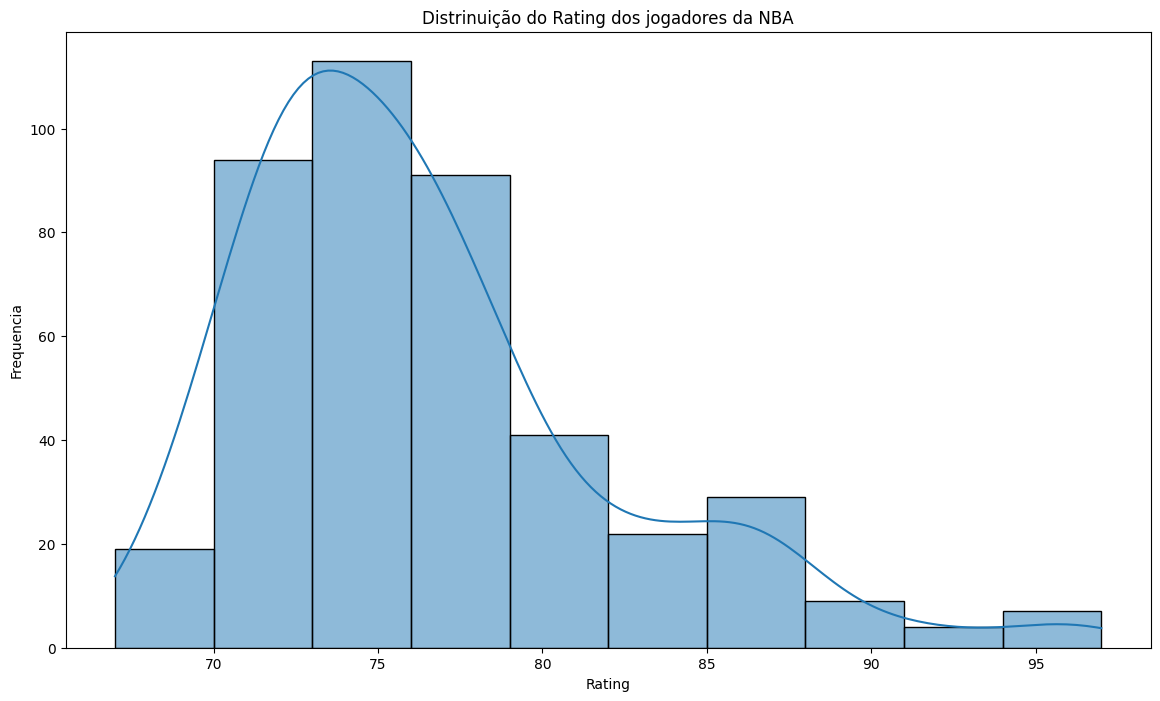

In [ ]:
#distribuição do Rating dos Jogadores
plt.figure(figsize=(14, 8))
plt.title('Distrinuição do Rating dos jogadores da NBA')
sns.histplot(kings['rating'], bins=10, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequencia')
plt.show

**Distribuição do Rating dos Jogadores da NBA é claro e informativo, indicando o que o gráfico representa.**

**Interpretação dos Dados**

Forma da Distribuição: O gráfico  mostra  a distribuição dos ratings, o qual é simétrica, assimétrica, normal ou se possui múltiplos picos.

A distribuição normal indica que a maioria dos jogadores tem ratings próximos da média, enquanto uma distribuição assimétrica  indica que há mais jogadores com ratings baixos ou altos.

Concentração de Ratings:

A análise da densidade (linha KDE) pode revela onde os ratings se concentram mais, ajudando a identificar faixas de rating mais comuns entre os jogadores.

**Insights**

Identificação de Talentos: Um pico elevado em uma faixa específica de rating pode indicar que muitos jogadores estão performando em um nível semelhante, o que pode ser relevante para recrutamento e análise de desempenho.

Avaliação do Desempenho Geral:

Se a maioria dos jogadores estiver concentrada em uma faixa baixa de ratings, isso pode sugerir a necessidade de melhorias na equipe ou na gestão de talentos.

Comparações Futuras:

Esse gráfico serve como base para futuras análises, permitindo comparações ano a ano ou entre diferentes equipes, ajudando a monitorar o desenvolvimento de jogadores.

**Considerações Finais**

O histograma com a linha de densidade é uma ferramenta valiosa para visualizar a distribuição de ratings, oferecendo insights sobre a qualidade geral dos jogadores da NBA.

<function matplotlib.pyplot.show(close=None, block=None)>

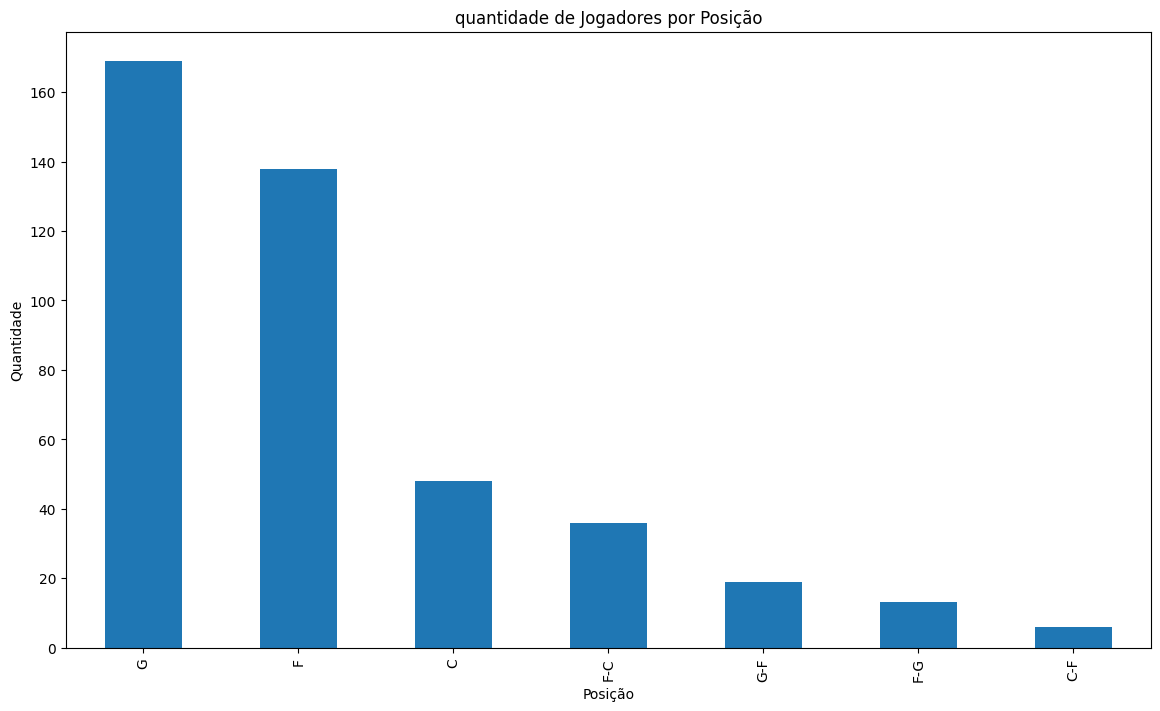

In [ ]:
#Posições Jogadores
plt.figure(figsize=(14, 8))
kings['position'].value_counts().plot(kind='bar')
plt.title('quantidade de Jogadores por Posição')
plt.xlabel('Posição')
plt.ylabel('Quantidade')
plt.show

Quantidade de Jogadores por Posição" é claro e direto, informando exatamente o que o gráfico representa.

**Interpretação dos Dados:**

Ao observar as barras, você pode identificar rapidamente quais posições são mais populares ou têm mais jogadores.

Por exemplo, se uma posição como "atacante" tiver uma barra significativamente maior, isso pode indicar uma estratégia ou tendência no recrutamento de jogadores.

Por outro lado, posições como "Field goal" ou "Goaltending" podem ter quantidades menores, o que pode gerar discussões sobre a formação e estilo de jogo da equipe.

**Insights:**

Se houver um grande desequilíbrio entre as posições, isso pode sugerir a necessidade de reforço em certas áreas.


**Conclusão:**

O gráfico é uma ferramenta visual poderosa para entender a distribuição de jogadores nas posições e pode ser um ponto de partida para decisões estratégicas em relação à equipe, seja em contratações, formações ou até mesmo em treinamento.

<function matplotlib.pyplot.show(close=None, block=None)>

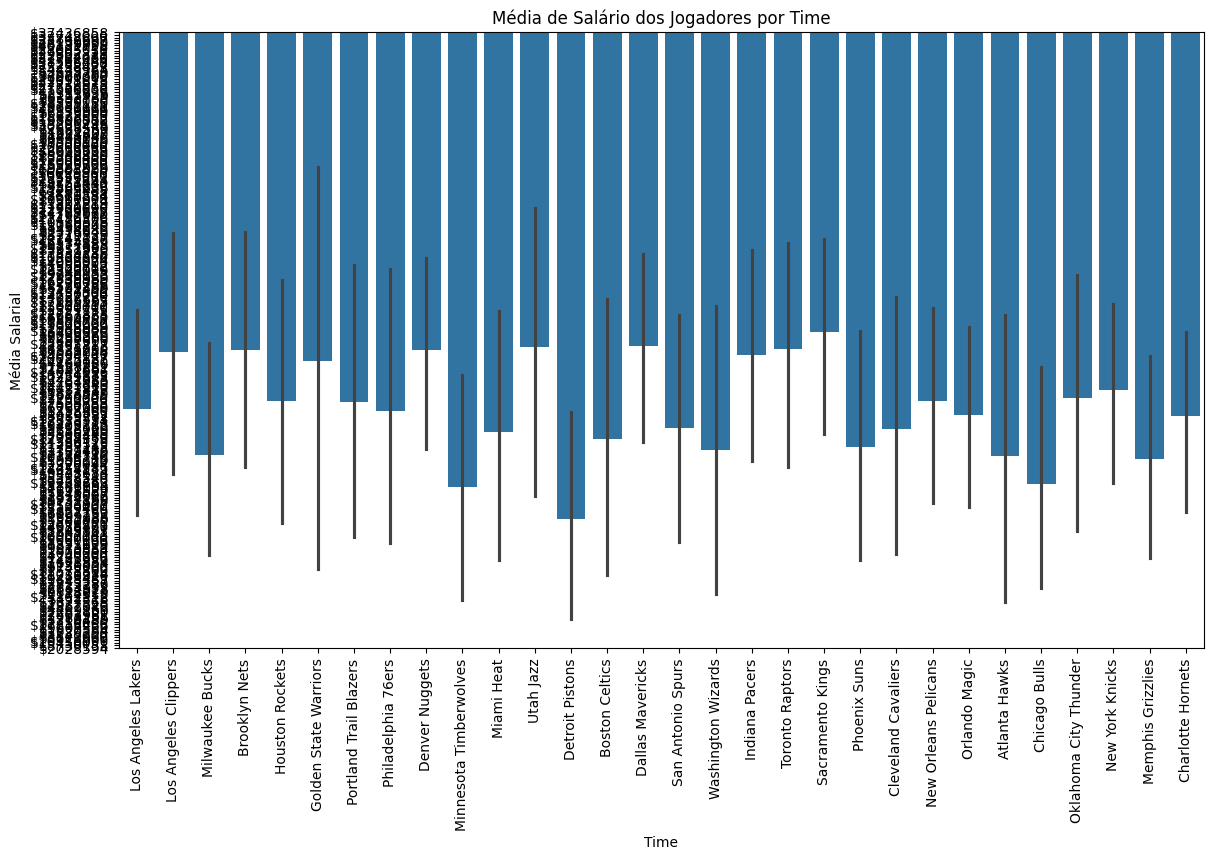

In [ ]:
plt.figure(figsize=(14, 8))
plt.title('Média de Salário dos Jogadores por Time')
sns.barplot(x='team', y='salary', data=kings)
plt.xlabel('Time')
plt.ylabel('Média Salarial')
plt.xticks(rotation=90)
plt.show

Média de Salário dos Jogadores por Time" é claro e informativo, indicando exatamente o que o gráfico representa.

**Interpretação dos Dados**

Ao observar as barras, é possível identificar rapidamente quais times têm os salários médios mais altos e mais baixos.
Times com barras mais altas podem indicar maior investimento em jogadores, o que pode estar relacionado ao desempenho esportivo, popularidade ou estratégias de recrutamento.

Times com salários mais baixos podem enfrentar desafios em atrair ou reter talentos, o que pode impactar seu desempenho a longo prazo.

**Insights**

Desigualdade Salarial: O gráfico pode revelar desigualdades significativas nos salários entre os times. Essa informação é valiosa para entender a dinâmica do mercado de jogadores.
Estratégias de Recrutamento: Times que investem mais em salários podem ter uma abordagem mais agressiva no recrutamento, enquanto os que pagam menos podem ter que buscar talentos em categorias de base ou apostas em jogadores menos conhecidos.



**Considerações Finais**

O gráfico é uma ferramenta poderosa para visualizar e analisar a média salarial dos jogadores por time. Ele pode ser utilizado como um ponto de partida para discussões sobre investimento em jogadores, gestão de equipes e estratégias de mercado.


Conclusão sobre os Gráficos Apresentados

Os gráficos apresentados oferecem uma visão clara e comparativa sobre a distribuição de jogadores por posição e a média salarial por time, ambos essenciais para entender a dinâmica de uma equipe esportiva.

**Distribuição de Jogadores por Posição:**

O gráfico de barras que mostra a quantidade de jogadores por posição permite identificar rapidamente quais posições são mais populares dentro da equipe. Isso pode refletir a estratégia de jogo adotada, a necessidade de reforços em determinadas áreas e a formação tática da equipe.
A análise dessas distribuições pode levar a decisões estratégicas, como a necessidade de investir em posições menos representadas, garantindo um equilíbrio na equipe.

**Média Salarial dos Jogadores por Time:**

O gráfico que ilustra a média salarial dos jogadores por time revela desigualdades salariais que podem influenciar a competitividade e o desempenho da equipe. Times com salários mais altos tendem a atrair talentos de maior qualidade, enquanto aqueles com salários mais baixos podem enfrentar desafios na retenção e atração de jogadores.

Essa análise pode ajudar a entender a relação entre investimento financeiro e sucesso esportivo, permitindo que gestores e analistas formulem estratégias mais eficazes para construção de equipes.

**Reflexões Finais**

Juntos, esses gráficos fornecem uma base sólida para discutir questões estratégicas e operacionais no contexto esportivo. A visualização de dados permite uma compreensão mais profunda das dinâmicas internas da equipe, auxiliando na formulação de decisões informadas sobre contratações, formações e estratégias de longo prazo. Para um planejamento eficaz, é crucial que esses dados sejam analisados em conjunto com outras métricas de desempenho, permitindo uma abordagem holística para a gestão de equipes esportivas.